# creating Arabic system using Neural Network tecknique 
### team member
        #### zkaria Gamal
        #### yousef Ahmed Mohamed
        #### marwan sherif
        #### Diaa Emad
        #### hazem Gamal sayed
        #### radi zein eldin
        #### hussein handy
        #### Ali Essam eldin
        #### mahmoud Abd el sattar
        #### yousef mahmoud
### supervisor:
    ### DR: hamed el simary

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import keras
from keras.models import Sequential
from keras.layers import Dense , Flatten , Conv2D , MaxPooling2D ,BatchNormalization , Dropout
from keras.utils import to_categorical

In [3]:
train_img = pd.read_csv('./train_img.csv')
train_label = pd.read_csv('./train_label.csv')
test_img = pd.read_csv('./test_img.csv')
test_label = pd.read_csv('./test_label.csv')

In [4]:
test_label.head()

,0
0,1
1,2
2,3
3,4
4,5


## to get the values from dataFrame 
## print the shape of dataset

In [5]:
x_train = train_img.values
x_test = test_img.values

In [6]:
print(x_train.shape)
print(x_test.shape)

(59999, 784)
(9999, 784)


# Normalize the data to make CNN faster

In [7]:
x_train , x_test = (x_train / 255.0) ,(x_test / 255.0)

# then reshape the img to size number , 28w ,28h ,1d to make the image grayscale 


In [8]:
x_train  = x_train.reshape(x_train.shape[0] , 28 , 28, 1 )
x_test  = x_test.reshape(x_test.shape[0] , 28 , 28 ,1)
x_test.shape

(9999, 28, 28, 1)

# split data train into train and valid 


In [10]:
from sklearn.model_selection import train_test_split
x_train_CNN , x_valid , y_train_CNN , y_valid = train_test_split(x_train , train_label , test_size=0.15 , random_state=42)

In [11]:
x_train_CNN.shape

(50999, 28, 28, 1)

# encoding labels
## 10 classes becouse the image start from 0 to 9

In [12]:
y_train_CNN = to_categorical(y_train_CNN, num_classes = 10)
y_valid  = to_categorical(y_valid , num_classes = 10)
y_test = to_categorical(test_label , num_classes=10)
print(y_test.shape)
print(y_train_CNN.shape)

(9999, 10)
(50999, 10)


# image fixing and visualizing

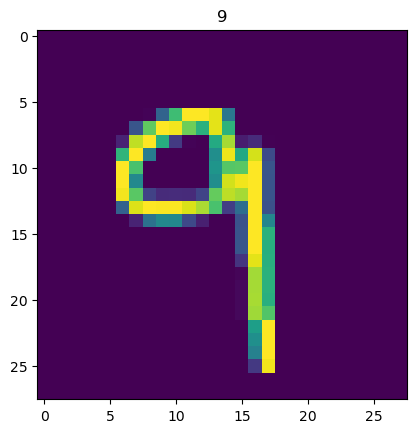

In [13]:
image = (x_test[38][:,:,0])
image = image.reshape([28, 28])
image = np.fliplr(image)
image = np.rot90(image)
plt.title(np.argmax(y_test[38]))
plt.imshow(image)

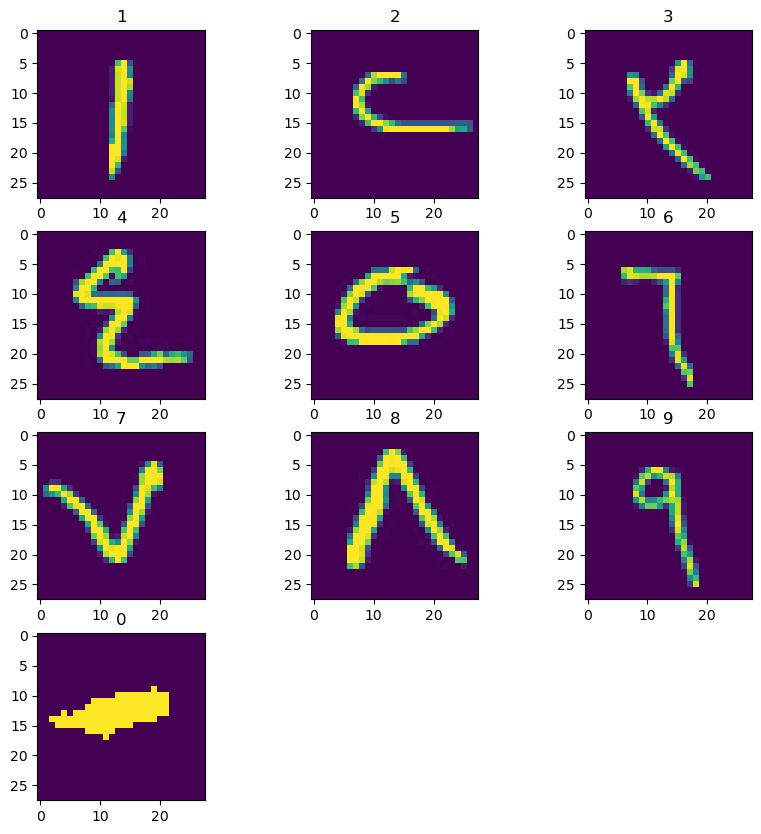

In [15]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(4,3,i+1)
    image = (x_test[i][:,:,0])
    image = image.reshape([28, 28])
    image = np.fliplr(image)
    image = np.rot90(image)
    plt.title(np.argmax(y_test[i]))
    plt.imshow(image)

# finally the step of building CNN model to predict numbers

In [17]:
# install model
classifier = Sequential()

# 1- convolution
classifier.add(Conv2D(32,(3,3),input_shape = (28, 28, 1), activation = 'relu'))
classifier.add(BatchNormalization())
# 2- pooling image
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.3))

#3-  Adding a second convolutional layer
classifier.add(Conv2D(32,(3,3), activation = 'relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.3)) #used for prevent overfitting model

#3-  Adding a third convolutional layer
classifier.add(Conv2D(64,(3,3),input_shape = (28, 28, 1) ,  activation = 'relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.5))
# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection and hidden layers
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 10, activation = 'softmax'))

# Compiling the CNN
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate = 0.001)
classifier.compile(optimizer = optimizer , loss = 'categorical_crossentropy'
                   , metrics = ['accuracy'])
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_5 (Bat  (None, 26, 26, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 batch_normalization_6 (Bat  (None, 11, 11, 32)       

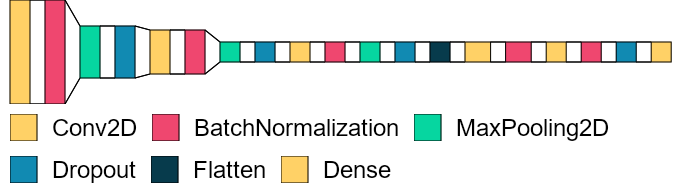

In [21]:
import visualkeras
import matplotlib.pyplot as plt

model = classifier
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf", 24)
visualkeras.layered_view(model , font=font , legend=True , spacing=15 , draw_volume=False)



In [22]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=20 , restore_best_weights=True)
callbacks = [earlystop]


In [25]:
history = classifier.fit( x_train_CNN , 
               y_train_CNN , 
               epochs = 30 , 
               callbacks= callbacks , 
               validation_data=(x_valid , y_valid),
               shuffle=True
                        )

Epoch 1/30
1594/1594 [==============================] - 68s 40ms/step - loss: 0.4769 - accuracy: 0.8538 - val_loss: 0.0642 - val_accuracy: 0.9809
Epoch 2/30
1594/1594 [==============================] - 81s 51ms/step - loss: 0.1443 - accuracy: 0.9586 - val_loss: 0.0457 - val_accuracy: 0.9878
Epoch 3/30
1594/1594 [==============================] - 84s 52ms/step - loss: 0.1111 - accuracy: 0.9682 - val_loss: 0.0380 - val_accuracy: 0.9881
Epoch 4/30
1594/1594 [==============================] - 67s 42ms/step - loss: 0.0935 - accuracy: 0.9739 - val_loss: 0.0322 - val_accuracy: 0.9909
Epoch 5/30
1594/1594 [==============================] - 63s 39ms/step - loss: 0.0838 - accuracy: 0.9771 - val_loss: 0.0312 - val_accuracy: 0.9922
Epoch 6/30
1594/1594 [==============================] - 62s 39ms/step - loss: 0.0781 - accuracy: 0.9778 - val_loss: 0.0338 - val_accuracy: 0.9914
Epoch 7/30
1594/1594 [==============================] - 63s 39ms/step - loss: 0.0732 - accuracy: 0.9795 - val_loss: 0.0275 -

In [26]:
y_pred = classifier.predict(x_test)
y_pred=np.argmax(y_pred,axis = 1)

313/313 [==============================] - 3s 10ms/step


# Graph that describe the loss and accuracy of the training set and the validation set (Training and validation curves)

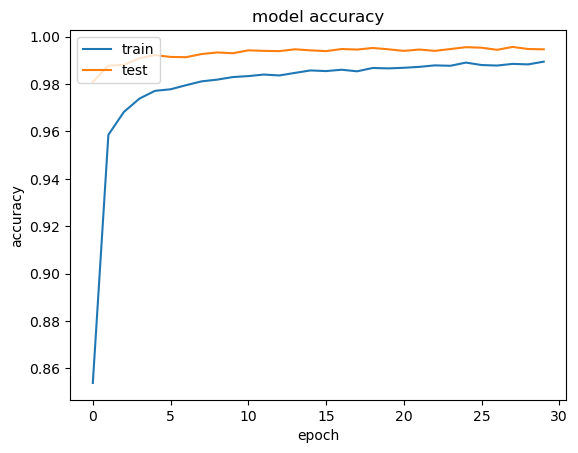

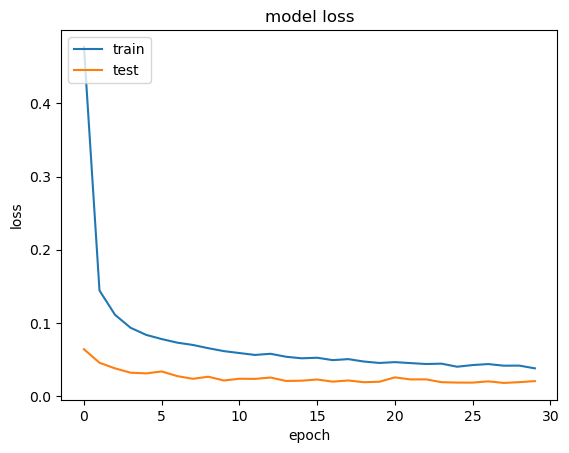

In [31]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# create the matrix to check the accuracy and evaluate the model

In [27]:
test_lab = pd.read_csv('./test_label.csv')
test_la = test_lab.values

In [28]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(test_la,y_pred)
acc = accuracy_score(test_la , y_pred)

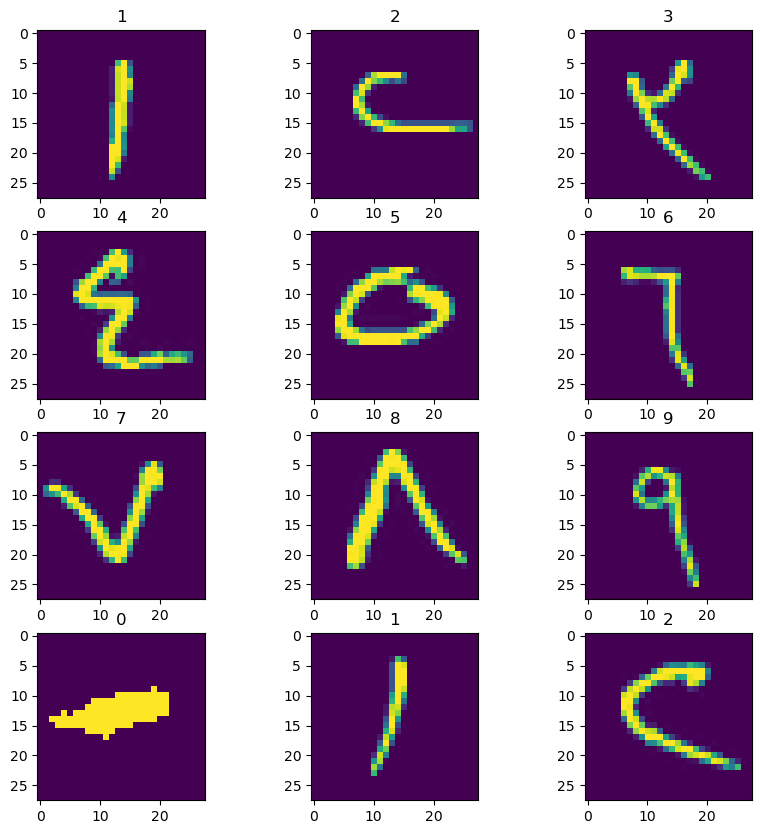

In [32]:
plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(4,3,i+1)
    image = (x_test[i][:,:,0])
    image = image.reshape([28, 28])
    image = np.fliplr(image)
    image = np.rot90(image)
    plt.title(np.argmax(y_test[i]))
    plt.imshow(image)

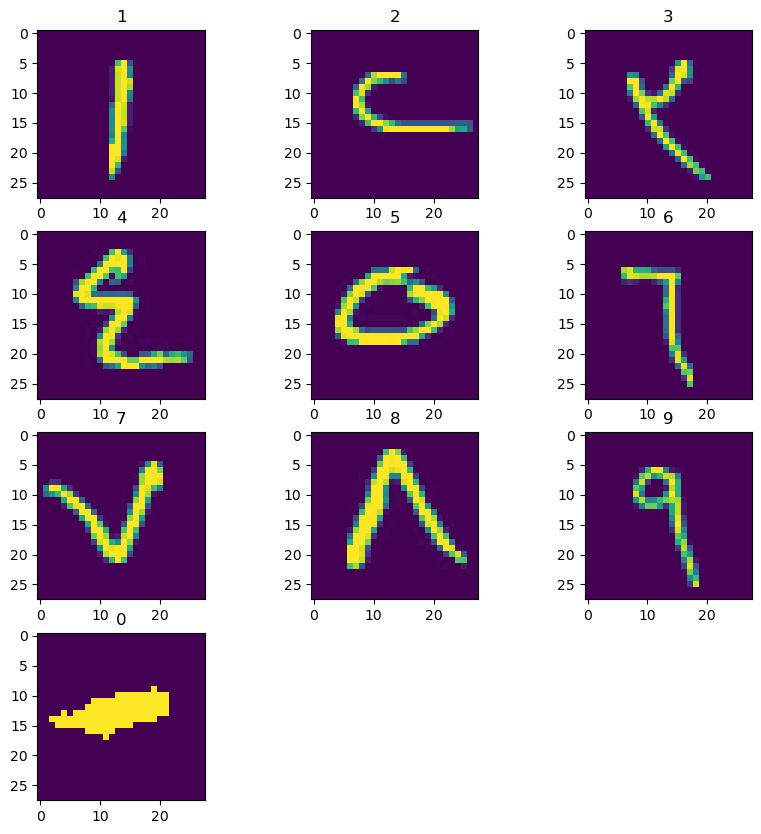

In [37]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(4,3,i+1)
    image = (x_test[i][:,:,0])
    image = image.reshape([28, 28])
    image = np.fliplr(image)
    image = np.rot90(image)
    plt.title(y_pred[i])
    plt.imshow(image)

In [29]:
print('accuracy :  ' , acc)

accuracy :   0.990999099909991


In [30]:
score = classifier.evaluate(x_test , y_test )
print('\n' , 'test accourcy : ' , score[1]*100)
print('\n' , 'test1 loss : ' , score[0])

313/313 [==============================] - 3s 10ms/step - loss: 0.0371 - accuracy: 0.9910

 test accourcy :  99.09991025924683

 test1 loss :  0.03711136430501938


In [38]:
classifier.save('number_model.h5')

C:\Users\ZKZK\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
